##Getting the data

In [2]:
import pandas as pd
data = pd.read_csv("heart_disease_data.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [4]:
data.shape

(303, 14)

1 --> Heart Disease</br>0 --> Healthy

In [5]:
data.target.value_counts()

,count
target,
1,165
0,138


##Data Analysis


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 500x500 with 0 Axes>

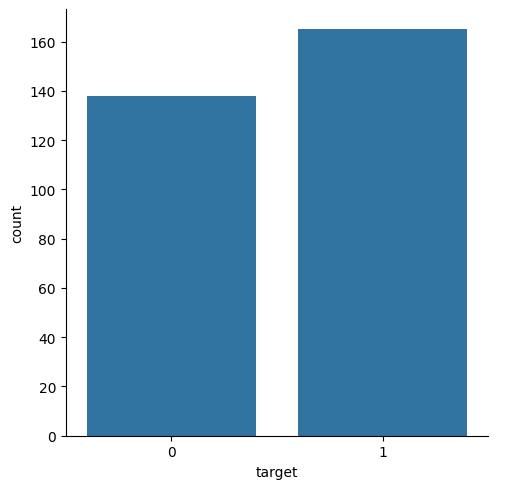

In [22]:
#categorial display
plot = plt.figure(figsize=(5,5))
sns.catplot(x="target",data=data,kind="count")

<Axes: xlabel='target', ylabel='slope'>

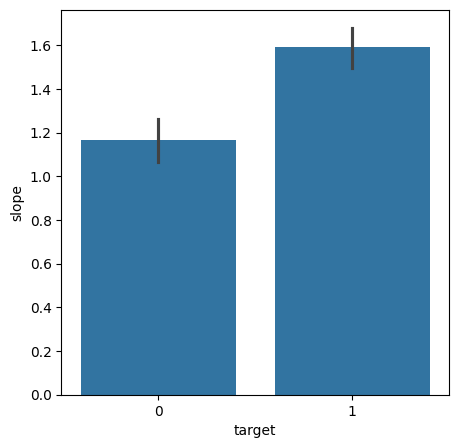

In [24]:
#slope vs target
plot = plt.figure(figsize=(5,5))
sns.barplot(x="target",y="slope",data=data)

##Splitting the datas

In [7]:
x = data.drop("target",axis=1)
y = data.target
print(x)
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, stratify = y, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


##Model : Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
predict_y = model.predict(x_test)

##Checking Accuracy

In [17]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,predict_y)
print(f"The accuracy score is {acc :.2f}")

The accuracy score is 0.82


##Predicting with real time data

In [19]:
import numpy as np

In [20]:
input = (56,	0,	1,	140,	294,	0,	0,	153,	0,	1.3,	1,	0,	2)
input_numpy_array = np.asarray(input)
input_arry_reshaped = input_numpy_array.reshape(1,-1)
prediction = model.predict(input_arry_reshaped)
print(prediction)
if prediction[0] == 0:
  print("The person is healthy")
else:
  print("The person has heart disease")

[1]
The person has heart disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
